In [1]:
#Step 1: Loading the Dataset

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from torch.utils.data import DataLoader,TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# function is used to load the dataset using pandas library.
def load_data(file_name):
    NNData = pd.read_csv(file_name, index_col=False)
    return NNData
NNData = load_data("dataset.csv")
NNData

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,e,0
762,10,101,76,48,180,d,0.171,0
763,2,122,70,27,b,36.8,0.34,0
764,c,121,72,23,112,26.2,0.245,0


In [4]:
# function is used to find the shape of the Dataset
def shapeDataset(df):
    print(df.shape)
shapeDataset(NNData)

(766, 8)


In [5]:
# function is used to print all the Columns in the Dataset
def columnNames(df):
    print(df.columns)

columnNames(NNData)

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target'], dtype='object')


In [6]:
# function is used to print all datatypes of Columns in the Dataset
def dataTypeInput(df):
    print(df.dtypes)
dataTypeInput(NNData)

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object


In [7]:
# function is used to get more info about the datatypes 
def moreInfo(df):
    print(df.info())
moreInfo(NNData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB
None


In [8]:
# function is used to get Descriptive statistics
def describeStats(df):
    return df.describe()

describeStats(NNData)

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [9]:
# function is used to check the null values in datasets
def checkNullSum(df):
    return df.isnull().sum(axis=0)

checkNullSum(NNData)

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [10]:
# function is used to remove the imbalanced data from dataset
def removeImbalancedData(df):
    delete_row1 = df[df["f1"]=='c'].index
    delete_row2 = df[df["f2"]=='f'].index
    delete_row3 = df[df["f4"]=='a'].index
    delete_row4 = df[df["f5"]=='b'].index
    delete_row5 = df[df["f6"]=='d'].index
    delete_row6 = df[df["f7"]=='e'].index
    df = df.drop(delete_row1)
    df = df.drop(delete_row2)
    df = df.drop(delete_row3)
    df = df.drop(delete_row4)
    df = df.drop(delete_row5)
    df = df.drop(delete_row6)
    
    return df
NNData=removeImbalancedData(NNData)

In [11]:
# function is used to convert the data from objects to integers.
def convertType(df):
    list_col = df.dtypes[df.dtypes == "object"].index
    df[list_col] = df[list_col].apply(pd.to_numeric, errors='coerce')
convertType(NNData)

# Visualization:1

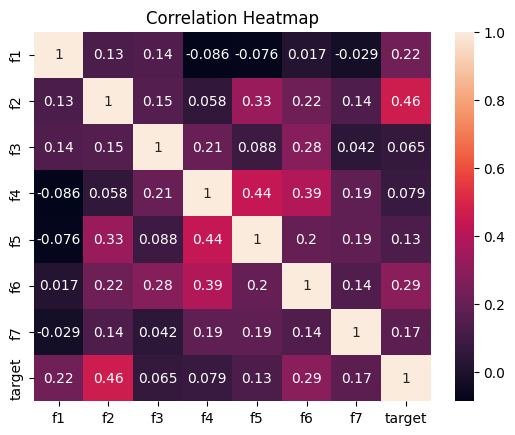

In [12]:
# function is used to print correlation between the variables using heatmap (in  seaborn library )
def correlation(df):
    sns.heatmap(df.corr(),annot=True).set(title="Correlation Heatmap")
    plt.show()
correlation(NNData)

In [13]:
# function is used to print correlation martix.
def corMat(df):
    return df.corr()
corMat(NNData)

,f1,f2,f3,f4,f5,f6,f7,target
f1,1.000000,0.129712,0.140772,-0.085733,-0.076051,0.016894,-0.029486,0.224872
f2,0.129712,1.000000,0.151915,0.057686,0.333169,0.217232,0.137290,0.464028
f3,0.140772,0.151915,1.000000,0.206237,0.087869,0.281387,0.042023,0.065462
f4,-0.085733,0.057686,0.206237,1.000000,0.437391,0.391973,0.185557,0.078517
f5,-0.076051,0.333169,0.087869,0.437391,1.000000,0.199214,0.185638,0.132497
f6,0.016894,0.217232,0.281387,0.391973,0.199214,1.000000,0.140369,0.290889
f7,-0.029486,0.137290,0.042023,0.185557,0.185638,0.140369,1.000000,0.173610
target,0.224872,0.464028,0.065462,0.078517,0.132497,0.290889,0.173610,1.000000


In [14]:
# Inferances:
# From correlation Matrix we can determine that features f1,f2,f5,f6 are important features



# Visualization:2

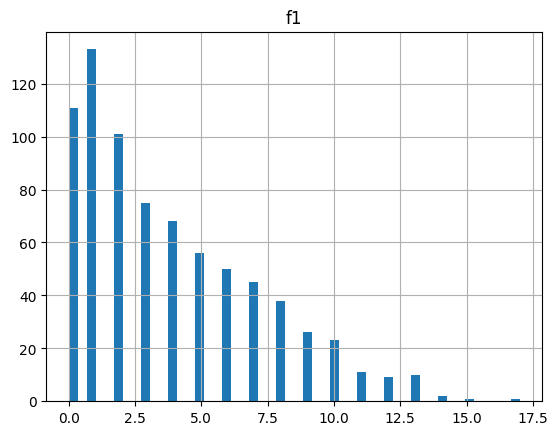

In [15]:
# function is used print histogram for the continous features[f1 to f7].
def hist(df,variable):
    figure=df[variable].hist(bins=50)
    figure.set_title(variable)
    
hist(NNData,"f1")

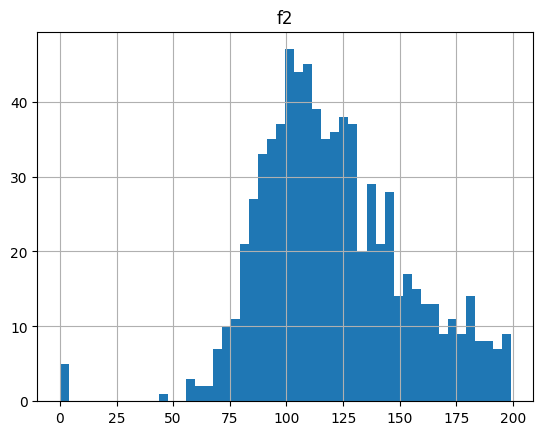

In [16]:
hist(NNData,"f2")

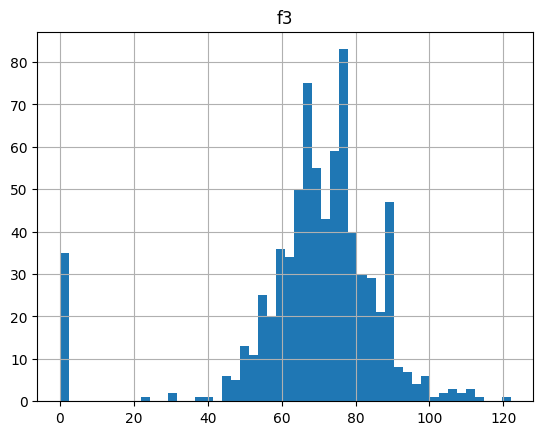

In [17]:
hist(NNData,"f3")

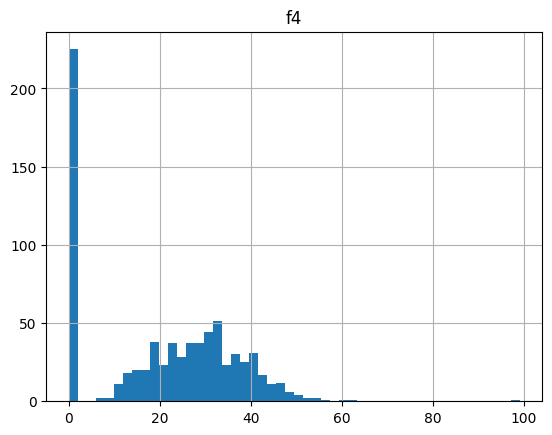

In [18]:
hist(NNData,"f4")

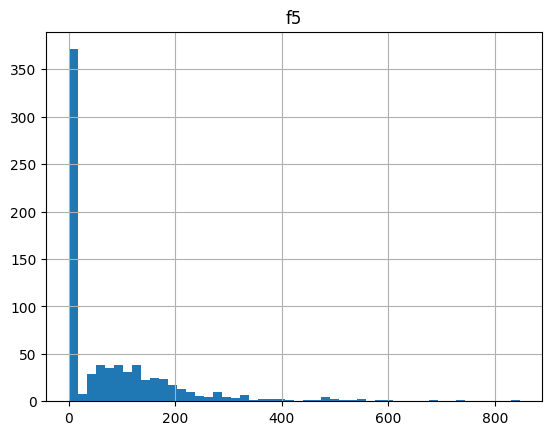

In [19]:
hist(NNData,"f5")

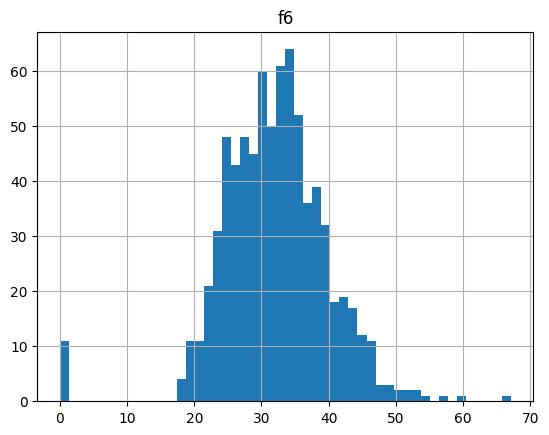

In [20]:
hist(NNData,"f6")

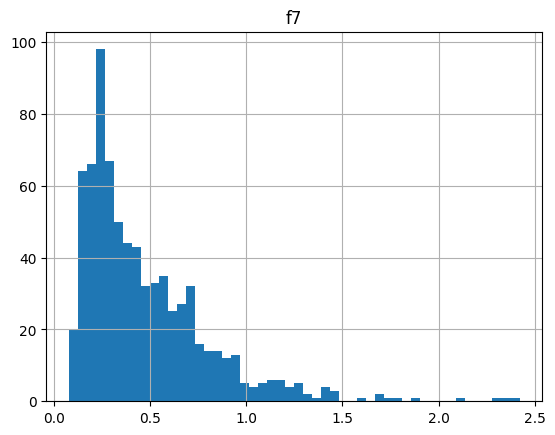

In [21]:
hist(NNData,"f7")

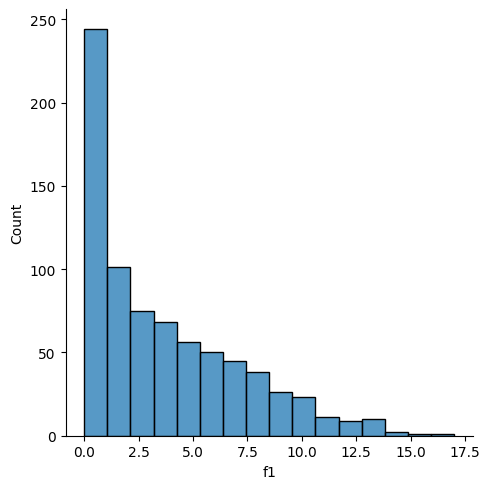

In [22]:
# function is print distplot for the features[f1 to f7].

def displot(df,variable):
    sns.displot(df[variable])

displot(NNData,"f1")

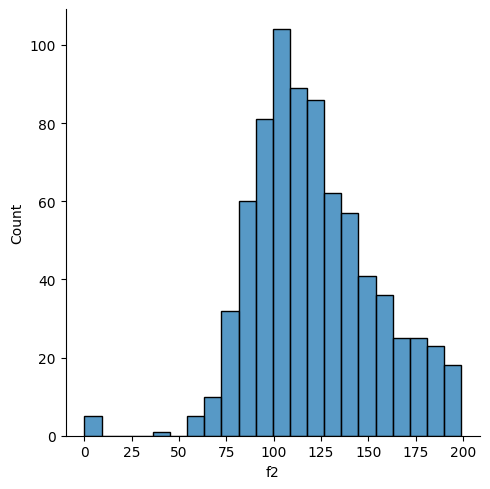

In [23]:
displot(NNData,"f2")

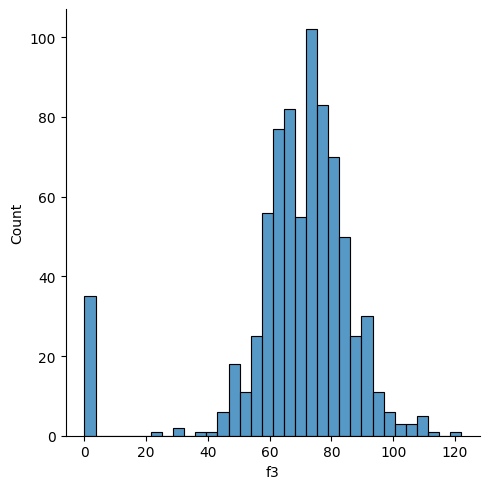

In [24]:
displot(NNData,"f3")

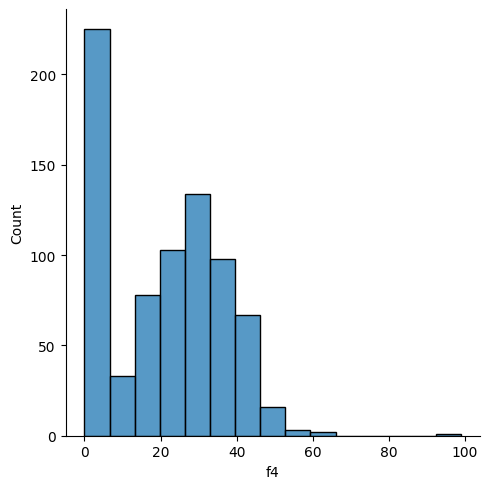

In [25]:
displot(NNData,"f4")

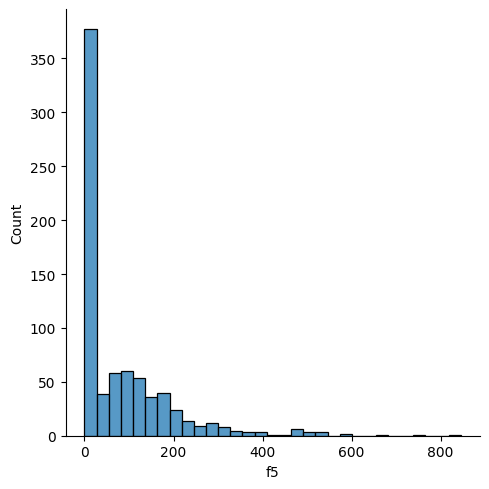

In [26]:
displot(NNData,"f5")

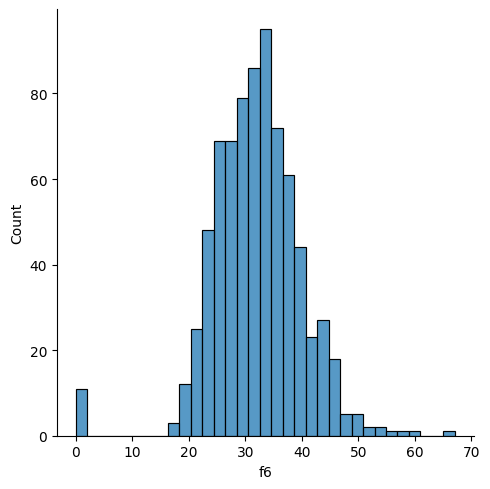

In [27]:
displot(NNData,"f6")

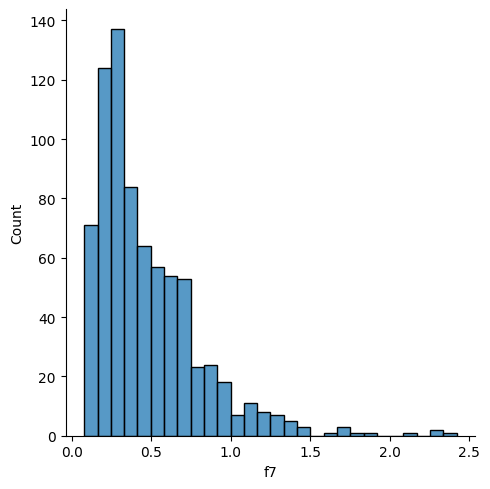

In [28]:
displot(NNData,"f7")

In [29]:
# Inferences:
# From the above graphs we can infer that f1,f4,f5,f7 are having positive Skewness.

In [30]:
# Visualization-3

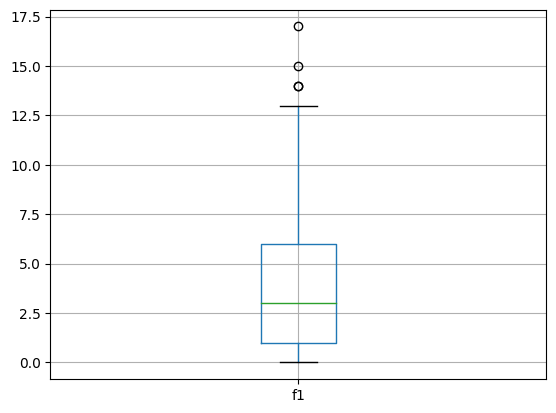

In [31]:
# function is used to print boxplot 
def boxplot(df,variable):
    figure=df.boxplot(column=variable)
boxplot(NNData,"f1")

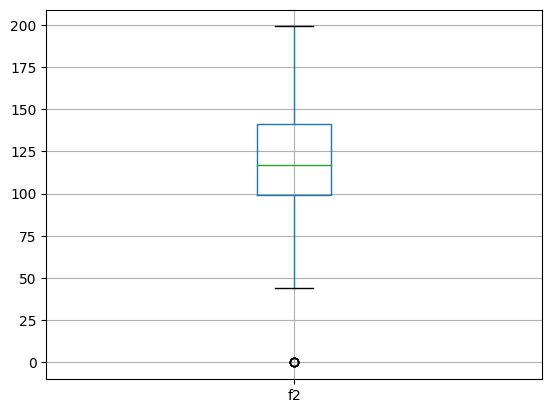

In [32]:
boxplot(NNData,"f2")

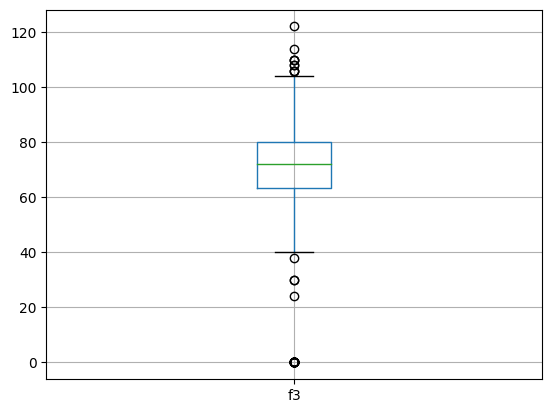

In [33]:
boxplot(NNData,"f3")

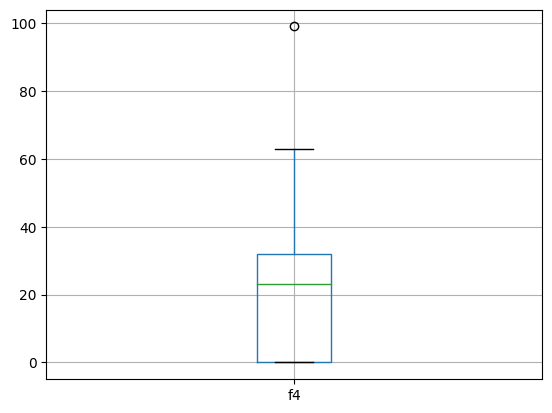

In [34]:
boxplot(NNData,"f4")

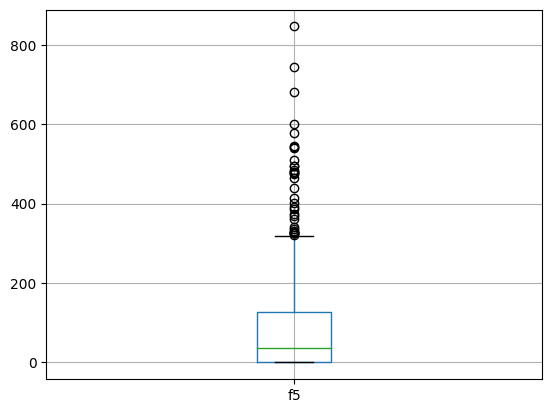

In [35]:
boxplot(NNData,"f5")

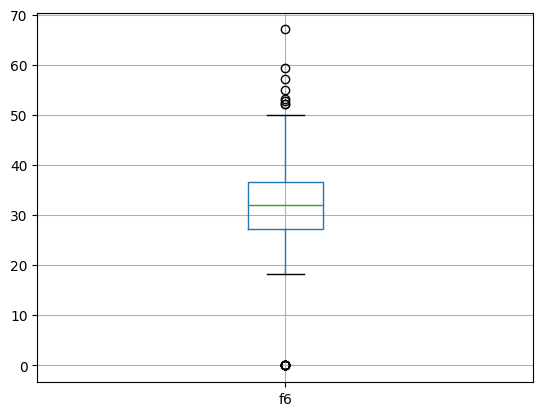

In [36]:
boxplot(NNData,"f6")

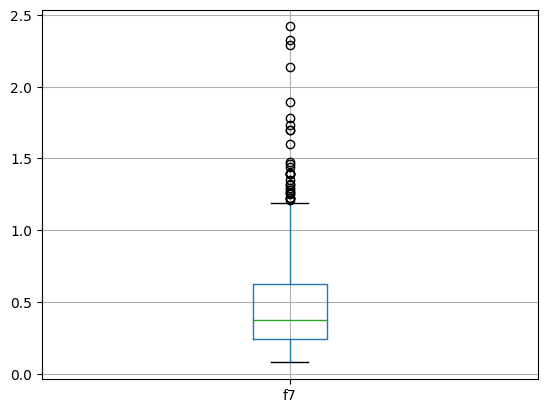

In [37]:
boxplot(NNData,"f7")

In [38]:
# Interfere:
# from the graph it is evident that there are outliers in all the features.

In [39]:
#Step 2: Preprocessing the Dataset

In [40]:
# function is used to prepare the data.
def prepareDataset(df):
    X=df.iloc[:,:-1]
    Y=df['target']
    return X,Y
X,Y = prepareDataset(NNData)

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# function is used to select best feaatures using SelectKBest
def feature_selection(X,Y):
    ordered_rank_features=SelectKBest(score_func=chi2,k=7)
    ordered_feature=ordered_rank_features.fit(X,Y)
    dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
    dfcolumns=pd.DataFrame(X.columns)
    features_rank=pd.concat([dfcolumns,dfscores],axis=1)
    features_rank.columns=['Features','Score']
    return features_rank

feature_selection(X,Y)

,Features,Score
0,f1,113.330583
1,f2,1385.431629
2,f3,17.794564
3,f4,58.103767
4,f5,2218.560921
5,f6,125.253307
6,f7,5.337072


In [42]:
# function is used to normalise the data using StandardScaler
def normalise(df,Y):
    scaler = StandardScaler()
    print(scaler.fit(df))
    print("Mean for given Dataset",scaler.mean_)
    data = pd.DataFrame(scaler.transform(df),columns = df.columns)
    data['target'] = Y
    return data

NNData = normalise(X,Y)
print("data",NNData)

StandardScaler()
Mean for given Dataset [  3.83421053 120.96973684  69.11973684  20.50789474  80.23421053
  31.99868421   0.47325   ]
data            f1        f2        f3        f4        f5        f6        f7  \
0    0.644092  0.844637  0.148213  0.908737 -0.694636  0.202839  0.463021   
1   -0.842876 -1.123976 -0.160536  0.532503 -0.694636 -0.683852 -0.368158   
2    1.238879  1.938311 -0.263452 -1.285961 -0.694636 -1.101863  0.598540   
3   -0.842876 -0.998985 -0.160536  0.156269  0.119179 -0.493847 -0.922278   
4   -1.140270  0.500911 -1.498446  0.908737  0.759842  1.406204  5.465156   
..        ...       ...       ...       ...       ...       ...       ...   
755 -0.842876  0.219680  0.971542  1.159559  0.257700  0.570182  1.757975   
756  0.941485  0.500911  1.074458  1.284971 -0.694636  0.000167 -0.247698   
757 -1.140270  0.063441  0.148213 -1.285961 -0.694636  0.544848 -0.648230   
758 -0.842876 -0.467772  0.354045 -1.285961 -0.694636  0.696852 -0.831932   
759  0.644092 

In [43]:
# function is used to convert dataframe into tensor data
def preparingtensorData(df):
    X = torch.tensor(df.drop('target',axis = 1).values.astype(np.float32))
    Y = torch.LongTensor(df['target'].values.astype(np.longlong))
    return X,Y
X,Y = preparingtensorData(NNData)

In [44]:
from sklearn.model_selection import train_test_split
# function is used to split the data into training and testing.
def split_train_test(X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
    return X_train,X_test,Y_train,Y_test

X_train,X_test,Y_train,Y_test=split_train_test(X,Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([608, 7])
torch.Size([152, 7])
torch.Size([608])
torch.Size([152])


In [45]:
# function is used to preare in such way that we can easily load the data in training and testing.
def dataToLoad(X_train,Y_train,X_test,Y_test):
  train_dataloader = DataLoader(TensorDataset(X_train,Y_train),shuffle=True,batch_size=10)
  test_dataloader = DataLoader(TensorDataset(X_test,Y_test),shuffle=True,batch_size=10)
  return train_dataloader,test_dataloader

train_dataloader,test_dataloader = dataToLoad(X_train,Y_train,X_test,Y_test)

In [46]:
# this piece of code is used to set the device to CPU or GPU.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [47]:
#Step 3: Defining the Neural Network

In [48]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [49]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)


In [50]:
# How many input neurons are there?
  # The no.of input neurons are 7 as we have 7 no.of nodes

# What activation function will you choose?
  # The activation function used in this neuralNetwork is ReLU.

# What is the number of hidden layers?
  # For basic Neural Network we have used only one hidden layer.

# What is the size of each hidden layer?
  # The size of the hidden layer is 128

# What activation function is used for the hidden and output layer?
  # The activation function used in hidden layer is ReLU.
  # we didn't used any activation function for output layer 

In [51]:
# Step 4: Training the Neural Network

In [52]:
''' 1.Set up the training loop: In this step, you will create a loop that iterates over the training data for a specified
 number of epochs. For each epoch, you will iterate over the batches of the training data, compute the forward
  pass through the neural network, compute the loss, compute the gradients using backpropagation, and update the weights of the network using an 
  optimizer such as Stochastic Gradient Descent (SGD) or Adam.
'''
#Each epoch consists of two main parts:
#The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
#The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    trainingloss_list = []
    trainAcc_list = []
    correct = 0
    for batch_size, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        predict_val  = model(X)
        loss =  loss_fn(predict_val, y)
        trainingloss_list.append(loss.item())
        correct += (predict_val.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_size % 100 == 0:
            loss = loss.item()  
            current= (batch_size + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            print(trainingloss_list[-1])

    trainAcc_list.append(correct/size)
    print(trainAcc_list[-1])
    return trainingloss_list[-1],trainAcc_list[-1]


In [53]:
'''2.Define the loss function that will be used to compute the error between the predicted output of the neural network and the true labels of the
training data.
'''

def test_loop(dataloader, model, loss_fn):
    size , num_batches= len(dataloader.dataset),len(dataloader)
    test_loss, correct = 0, 0
    testloss_list=[]
    testAcc_list=[]
    y_predList = []
    y_valList= []
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            y_predList.extend(pred.argmax(1).tolist())
            y_valList.extend(y.tolist())
    test_loss /= num_batches
    correct /= size
    testloss_list.append(test_loss)
    #print(pred_list)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return y_predList,y_valList,correct,testloss_list

In [54]:
'''3.Choose an optimizer and a learningrate. It will update the weights of the neural network during training.
Stochastic Gradient Descent (SGD) is one of the commonly used, you can also explore other optimizers like Adam or RMSProp
'''
#Hyperparameters
#Number of Epochs - the number times to iterate over the dataset
#Batch Size - the number of data samples propagated through the network before the parameters are updated
#Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [55]:
''' 4.Train the neural network. Run the training loop and train the neural network on the training data. Select the number of epochs and batch size.
 Monitor the training loss and the validation loss at each epoch to ensure that the model is not overfitting to the training data.
'''
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
    
print("Done!")

Epoch 1
-------------------------------
loss: 0.782824  [   10/  608]
0.7828236222267151
0.3667763157894737
Test Error: 
 Accuracy: 40.1%, Avg loss: 0.706520 

Epoch 2
-------------------------------
loss: 0.681197  [   10/  608]
0.681196928024292
0.5230263157894737
Test Error: 
 Accuracy: 55.9%, Avg loss: 0.689757 

Epoch 3
-------------------------------
loss: 0.673034  [   10/  608]
0.6730343103408813
0.6529605263157895
Test Error: 
 Accuracy: 63.2%, Avg loss: 0.672442 

Epoch 4
-------------------------------
loss: 0.653341  [   10/  608]
0.6533406972885132
0.6825657894736842
Test Error: 
 Accuracy: 60.5%, Avg loss: 0.667600 

Epoch 5
-------------------------------
loss: 0.693181  [   10/  608]
0.6931809186935425
0.6776315789473685
Test Error: 
 Accuracy: 61.8%, Avg loss: 0.666087 

Epoch 6
-------------------------------
loss: 0.592067  [   10/  608]
0.5920671224594116
0.680921052631579
Test Error: 
 Accuracy: 61.8%, Avg loss: 0.654702 

Epoch 7
-------------------------------
lo

Text(0.5, 1.0, 'TRAIN LOSS PLOT Vs TEST LOSS ')

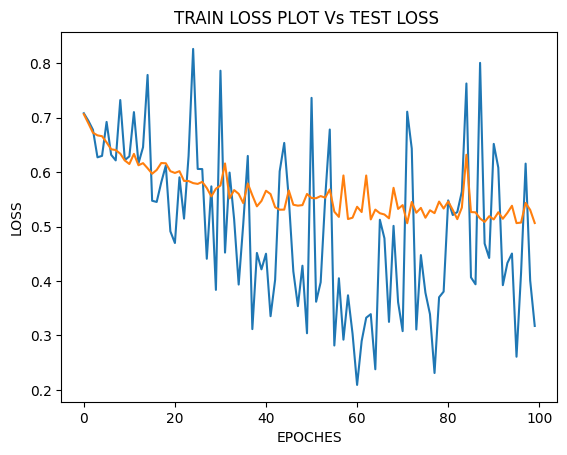

In [56]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,traininglosses)
plt.plot(l,testlosses)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN LOSS PLOT Vs TEST LOSS ")

Text(0.5, 1.0, 'TRAIN ACC PLOT Vs TEST ACC ')

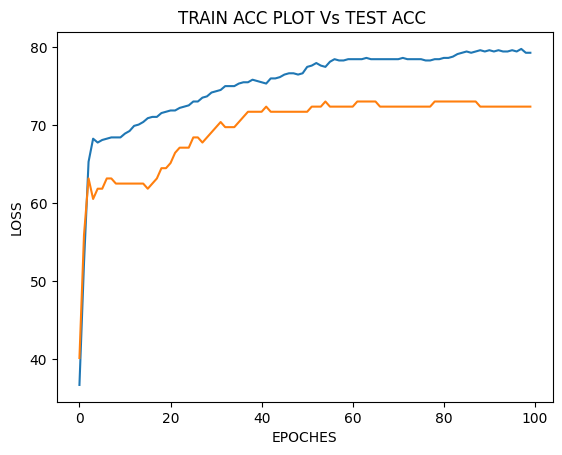

In [57]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC ")

In [58]:
# 5. Evaluate the performance of the model on the testing data.
# The expected accuracy for this task is more than 75%.
  # the testing accuracy is 80.9% with the following hyperparameters
   # - learning_rate = 1e-3
   # - batch_size = 10
   # - epochs = 100
   # - loss function = CrossEntropyLoss
   # - optimizer = SGD

In [59]:
# 6. Save the weights of the trained neural network.

model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[ 2.1099e-01,  1.1591e-02,  2.8984e-01,  2.4204e-01,  3.6198e-01,
                       -7.6305e-02,  2.4736e-01],
                      [ 2.2592e-02,  2.6988e-01,  3.4158e-01, -1.0654e-02,  3.1444e-01,
                       -4.2555e-02, -3.3247e-02],
                      [ 3.1127e-01,  3.1228e-01,  8.6067e-02, -1.7405e-01, -3.4682e-01,
                        1.2896e-01,  9.4593e-02],
                      [-2.8773e-01, -7.7251e-02,  1.8930e-01,  2.6126e-01, -3.4653e-01,
                       -8.6309e-02, -8.9126e-02],
                      [ 1.6043e-01,  9.0498e-02,  2.7771e-01, -1.6115e-01,  1.1802e-01,
                       -7.1112e-02, -4.3577e-02],
                      [-3.0257e-01,  1.7380e-01, -1.4332e-01, -1.1376e-01,  1.6086e-01,
                        2.0961e-01,  5.5679e-02],
                      [-3.0496e-01, -1.0882e-01,  2.9220e-01,  3.0598e-01, -1.4703e-01,
                       -1.8030e-01,  2.8

In [65]:
from google.colab import drive
drive.mount('/content/gdrive')

model_path = '/content/gdrive/My Drive/models/my_model.pth'
torch.save(model,model_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
# Model class must be defined somewhere
state_dict = torch.load(model_path)

# Create an instance of the model
model = NeuralNetwork()

# Load the state dictionary into the model
model.load_state_dict(state_dict)

model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [ ]:
  # 7.Visualize the results.Use visualization techniques such as confusion matrices.

# confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_valList,y_predList)
confusion_mat

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Part II: Optimizing NN

In [ ]:
#1.Dropout

In [ ]:
# STEP-1 : Choose one hyperparameter to modify(e.g.Dropout).
# Fix the NN structure and all other parameters, and change values only for your chosen hyperparameter. 

class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [ ]:
model = NeuralNetwork(0.2).to(device)
print(model)

In [ ]:
# epochs = 100
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(train_dataloader, model, loss_fn, optimizer)
#     test_loop(test_dataloader, model, loss_fn)
# print("Done!")


baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH DROPOUT 0.2 ")

In [ ]:
model = NeuralNetwork(0.4).to(device)
print(model)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH DROPOUT 0.4 ")

In [ ]:
model = NeuralNetwork(0.6).to(device)
print(model)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH DROPOUT 0.6 ")

In [ ]:
#2 Optimizer

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
#Hyperparameters
#Number of Epochs - the number times to iterate over the dataset
#Batch Size - the number of data samples propagated through the network before the parameters are updated
#Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)


In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Optimizer as RMSprop ")

In [ ]:
#Hyperparameters
#Number of Epochs - the number times to iterate over the dataset
#Batch Size - the number of data samples propagated through the network before the parameters are updated
#Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Optimizer as ADAM ")

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Optimizer as ADAGRAD ")

In [ ]:
#3 Activation Function: LeakyReLU(0.1)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Activation function Leaky ReLU ")

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH ACtivation Function Tanh ")

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.PReLU(),
            nn.Linear(128, 128),
            nn.PReLU(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Activation function PerLU ")

In [ ]:
# 4 Initializer

In [ ]:
import torch.nn as nn
import torch.nn.init as init

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )
        for layer in self.linear_relu_stack:
            if isinstance(layer, nn.Linear):
                init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Weight Initialiser as Xavier ")

In [ ]:
import torch.nn as nn
import torch.nn.init as init

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH Weight Intializer as Kaiming ")

In [ ]:
def custom_init(m):
    if isinstance(m, nn.Linear):
        fan_in, _ = init._calculate_fan_in_and_fan_out(m.weight)
        bound = 1 / fan_in
        init.uniform_(m.weight, -bound, bound)
        init.zeros_(m.bias)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )

        self.apply(custom_init)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
baseacc_list = []
traininglosses=[]
trainingAcc = []
testlosses = []
epochs = 100
testAcc_list = 0
testloss_list=0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    baseacc_list.append(testAcc_list*100)
    testlosses.append(testloss_list)
print("Done!")

In [ ]:
import matplotlib.pyplot as plt
l=[i for i in range(len(traininglosses))]
plt.plot(l,trainingAcc)
plt.plot(l,baseacc_list)
plt.xlabel("EPOCHES")
plt.ylabel("LOSS")
plt.title("TRAIN ACC PLOT Vs TEST ACC WITH weight Initalization as custom Values ")

In [ ]:
# Step 3

In [ ]:
# 1.Batch Normalisation

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits;

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
accListWeight = []
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainingloss_list, trainAcc_list =train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)

    accListWeight.append(testAcc_list*100)
print("Done!")

In [ ]:
plt.plot(baseacc_list, label='base Acc')
plt.plot(accListWeight, label='weight decay Acc')
plt.legend()
plt.show()

In [ ]:
# 2.learning rate scheduler

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [ ]:
accListWeight = []
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    accListWeight.append(testAcc_list*100)
print("Done!")

In [ ]:
plt.plot(baseacc_list, label='base Acc')
plt.plot(accListWeight, label='weight decay Acc')
plt.legend()
plt.show()

In [ ]:
# 3.weight decay

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

In [ ]:
accListWeight = []
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    traininglosses.append(trainingloss_list)
    trainingAcc.append(trainAcc_list*100)
    y_predList,y_valList,testAcc_list,testloss_list = test_loop(test_dataloader, model, loss_fn)
    accListWeight.append(testAcc_list*100)

print("Done!")

In [ ]:
plt.plot(baseacc_list, label='base Acc')
plt.plot(accListWeight, label='weight decay Acc')
plt.legend()
plt.show()

In [ ]:
# 4.Early stopping

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
learning_rate = 1e-3
batch_size = 10
epochs = 100

# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

In [ ]:
def test_loop1(dataloader, model, loss_fn):
    size , num_batches= len(dataloader.dataset),len(dataloader)
    test_loss, correct = 0, 0
    testloss_list=[]
    testAcc_list=[]
    y_predList = []
    y_valList= []
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            y_predList.extend(pred.argmax(1).tolist())
            y_valList.extend(y.tolist())
    test_loss /= num_batches
    correct /= size
    testloss_list.append(test_loss)
    #print(pred_list)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return y_predList,y_valList,testloss_list

In [ ]:
epochs = 100
patience = 10
pre_acc = []
count = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    y_predList,y_valList,testloss_list = test_loop1(test_dataloader, model, loss_fn)
    if testloss_list>pre_acc:
      print(count)
      count = count+1
    if count>patience:
      print("Early stopping occurred....")
      break;
    pre_acc = testloss_list
print("Done!")

In [ ]:
#Reference:

#https://pytorch.org/docs 
#https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
#https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler